# Import Libraries

In [1]:
import csv 
import pandas as pd 
from tabulate import tabulate

# Define Constants 
These can be extracted from the csv data as well to make the code a bit more generic. But, in my opinion it's just unnecessary computational overhead.

In [4]:
ETHNICITIES = ['Hispanic', 'Caucasian', 'African American', 'Asian', 'Other']
TUMOR_LOCATIONS = ['Lower Lobe', 'Middle Lobe', 'Upper Lobe']
TREATMENTS = ['Surgery', 'Radiation Therapy', 'Chemotherapy', 'Targeted Therapy']

# Ask User for File Name

In [11]:
file_name = input("Enter File Name (including .csv extension): ")

Enter File Name (including .csv extension):  lung_data.csv


# Task A

## Import Lung Cancer Data using reader() function

In [15]:
records=[]

try:
    with open(file_name, encoding="utf-8") as csv_file:
        reader=csv.reader(csv_file)
        headings=next(csv_file)
        for line in reader:
            records.append(line)
except FileNotFoundError as e:
    print(f"File Not Found {e}")

In [17]:
# 0 Patient_ID
# 1 Age
# 2 Gender
# 3 Smoking_History
# 4 Tumor_Size_mm
# 5 Tumor_Location
# 6 Stage
# 7 Treatment
# 8 Survival_Months
# 9 Ethnicity
# 10 Insurance_Type
# 11 Family_History
# 12 Comorbidity_Diabetes
# 13 Comorbidity_Hypertension
# 14 Comorbidity_Heart_Disease
# 15 Comorbidity_Chronic_Lung_Disease
# 16 Comorbidity_Kidney_Disease
# 17 Comorbidity_Autoimmune_Disease
# 18 Comorbidity_Other
# 19 Performance_Status
# 20 Blood_Pressure_Systolic
# 21 Blood_Pressure_Diastolic
# 22 Blood_Pressure_Pulse
# 23 Haemoglobin_Level
# 24 White_Blood_Cell_Count
# 25 Platelet_Count
# 26 Albumin_Level
# 27 Alkaline_Phosphatase_Level
# 28 Alanine_Aminotransferase_Level
# 29 Aspartate_Aminotransferase_Level
# 30 Creatinine_Level
# 31 LDH_Level
# 32 Calcium_Level
# 33 Phosphorus_Level
# 34 Glucose_Level
# 35 Potassium_Level
# 36 Sodium_Level
# 37 Smoking_Pack_Years

## A1

In [20]:
from task_a import retrieve_demographic_information

patient_id=int(input("Please Enter Patient ID: "))
demographic_information = retrieve_demographic_information(patient_id, records)

if demographic_information:
    print(tabulate([demographic_information], headers="keys", tablefmt="pretty"))
else:
    print("Patient id not found!")

Please Enter Patient ID:  13117


+-----+--------+-----------------+-----------+
| Age | Gender | Smoking_History | Ethnicity |
+-----+--------+-----------------+-----------+
| 68  |  Male  | Current Smoker  | Hispanic  |
+-----+--------+-----------------+-----------+


## A2

In [23]:
from task_a import retrieve_medical_history

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    medical_history_records = retrieve_medical_history(ETHNICITIES[user_input-1], records)
    print(tabulate(medical_history_records, headers="keys", tablefmt="pretty"))
else:
    print("Invalid option!")
    

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  4


+------------+----------------+----------------------+----------------------------+-------------------+
| Patient_ID | Family_History | Comorbidity_Diabetes | Comorbidity_Kidney_Disease | Haemoglobin_Level |
+------------+----------------+----------------------+----------------------------+-------------------+
|   18647    |       No       |         Yes          |            Yes             |       13.55       |
|   24709    |      Yes       |         Yes          |             No             |       15.16       |
|   51117    |       No       |         Yes          |             No             |       11.22       |
|   27133    |      Yes       |          No          |            Yes             |       14.96       |
|   20173    |       No       |          No          |            Yes             |       17.36       |
|   19655    |       No       |          No          |            Yes             |       15.45       |
|   39217    |       No       |          No          |          

## A3

In [30]:
from task_a import retrieve_treatment_details

for i, treatment in enumerate(TREATMENTS, start=1):
    print(f"{i}. {treatment}")

user_input = int(input("\nEnter the option number: "))

treatment_detail_records = retrieve_treatment_details(records, TREATMENTS[user_input-1])
print(tabulate(treatment_detail_records, headers="keys", tablefmt="pretty"))

1. Surgery
2. Radiation Therapy
3. Chemotherapy
4. Targeted Therapy



Enter the option number:  1


+------------+-----------------+---------------+----------------+-----------+-----------+
| Patient_ID | Survival_Months | Tumor_Size_mm | Tumor_Location |   Stage   | Treatment |
+------------+-----------------+---------------+----------------+-----------+-----------+
|   55789    |       103       |     28.12     |  Middle Lobe   | Stage III |  Surgery  |
|   18771    |       101       |     40.47     |  Middle Lobe   | Stage IV  |  Surgery  |
|   48625    |       113       |     98.83     |   Lower Lobe   |  Stage I  |  Surgery  |
|   21337    |       110       |      70       |   Upper Lobe   | Stage II  |  Surgery  |
|   31745    |       110       |     68.19     |   Upper Lobe   | Stage III |  Surgery  |
|   12985    |       107       |     83.85     |   Upper Lobe   | Stage IV  |  Surgery  |
|   38845    |       119       |     31.52     |  Middle Lobe   |  Stage I  |  Surgery  |
|   40437    |       114       |     54.17     |   Lower Lobe   | Stage II  |  Surgery  |
|   22663 

## A4
### Retreieve all patients that meet the following criteria:
1. Older than 60
2. Have a history of smoking
3. Tumor size is greater than 50mm
4. Have a family history of the disease
5. Have at least stage III or above
6. Have comorbid hypertension
7. Have comorbid diabetes 

It's an interesting condition because it involves Age, Smoking History, Tumor Size, Family History, Comorbid Diseases like Hypertension and Diabetes, and Stage III or above, all of which are very important factors to consider for cancer prognosis. We'll call these patients **High Risk Patients**

In [33]:
from task_a import retrieve_high_risk_patients

high_risk_patients = retrieve_high_risk_patients(records)
print(tabulate(high_risk_patients, headers="keys", tablefmt="pretty"))

+------------+-----+-----------------+---------------+-----------+----------------+----------------------+--------------------------+
| Patient_ID | Age | Smoking_History | Tumor_Size_mm |   Stage   | Family_History | Comorbidity_Diabetes | Comorbidity_Hypertension |
+------------+-----+-----------------+---------------+-----------+----------------+----------------------+--------------------------+
|   52225    | 67  |  Former Smoker  |     82.7      | Stage III |      Yes       |         Yes          |           Yes            |
|   17911    | 78  |  Former Smoker  |     64.42     | Stage IV  |      Yes       |         Yes          |           Yes            |
|   55299    | 62  |  Former Smoker  |     90.02     | Stage III |      Yes       |         Yes          |           Yes            |
|   27329    | 75  |  Former Smoker  |     54.73     | Stage IV  |      Yes       |         Yes          |           Yes            |
|   21107    | 73  |  Former Smoker  |     97.2      | Stage I

# Task B

## Import Lung Cancer Data Using read_csv() function

In [37]:
try:
    df = pd.read_csv(file_name, header = 0 , encoding="utf-8")
except FileNotFoundError as e:
    print(f"File Not Found {e}")

In [39]:
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,13117,68,Male,Current Smoker,81.68,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.99,46.80,1.25,239.24,10.37,3.55,113.92,4.97,139.82,17.01
1,34677,58,Male,Never Smoked,78.45,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.12,39.71,1.46,233.52,10.08,2.95,101.32,3.90,135.45,93.27
2,38841,44,Male,Former Smoker,67.71,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.88,32.64,0.63,169.04,8.66,4.64,78.21,4.37,143.38,70.35
3,18169,72,Male,Current Smoker,70.81,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.91,44.32,0.59,213.97,8.83,3.62,127.90,4.35,138.59,19.83
4,18647,37,Female,Never Smoked,87.27,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.34,15.75,1.48,118.19,9.25,4.77,148.80,3.67,141.23,81.05


## B1

In [41]:
from task_b import retrieve_top_3_treatments

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    top_3_treatments = retrieve_top_3_treatments(df, ethnicity)
    print(top_3_treatments)
else:
    print("Invalid option!")

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  4


Treatment
Chemotherapy         110.469799
Surgery              110.159722
Radiation Therapy    109.973214
Name: Survival_Months, dtype: float64


## B2

In [44]:
from task_b import retrieve_average_white_blood_cell_counts

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    average_white_blood_cell_counts = retrieve_average_white_blood_cell_counts(df, ethnicity)
    print(average_white_blood_cell_counts)
else:
    print("Invalid option!")

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  2


Treatment
Chemotherapy         6.750183
Radiation Therapy    6.809458
Surgery              6.812232
Targeted Therapy     6.752524
Name: White_Blood_Cell_Count, dtype: float64


## B3

In [47]:
from task_b import retrieve_average_smoking_packs

for i, tumor_location in enumerate(TUMOR_LOCATIONS, start=1):
    print(f"{i}. {tumor_location}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(TUMOR_LOCATIONS) and user_input >= 1:
    tumor_location = TUMOR_LOCATIONS[user_input-1]
    average_smoking_packs = retrieve_average_smoking_packs(df, tumor_location)
    print(average_smoking_packs)
else:
    print("Invalid option!")

1. Lower Lobe
2. Middle Lobe
3. Upper Lobe



Enter the option number:  1


Treatment
Chemotherapy         53.168824
Radiation Therapy    41.365357
Surgery              51.673684
Targeted Therapy     43.178000
Name: Smoking_Pack_Years, dtype: float64


## B4
### Analyze the average tumor size across different stages for patients that meet the following criteria:
1. Older than 60
2. Have a history of smoking
3. Have a family history of disease
4. Have comorbid Heart Disease
5. Smoking pack years > 50

Basically we're trying to analyze the average tumor size for **High Risk Patients** across different stages of cancer for a certain ethnicity

In [50]:
from task_b import retrieve_average_tumor_size

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    average_tumor_size = retrieve_average_tumor_size(df, ethnicity)
    print(average_tumor_size)
else:
    print("Invalid option!")

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  2


Stage
Stage I      48.301579
Stage II     54.146000
Stage III    57.640385
Stage IV     57.540000
Name: Tumor_Size_mm, dtype: float64


# Task C

## C1

1. Hispanic
2. Caucasian
3. African American
4. Asian
5. Other



Enter the option number:  3


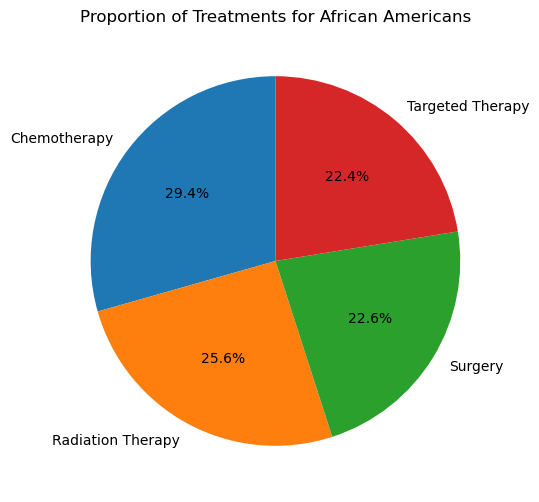

In [56]:
from task_c import plot_treatment_proportions

for i, ethnicity in enumerate(ETHNICITIES, start=1):
    print(f"{i}. {ethnicity}")

user_input = int(input("\nEnter the option number: "))

if user_input <= len(ETHNICITIES) and user_input >= 1:
    ethnicity = ETHNICITIES[user_input-1]
    plot_treatment_proportions(df, ethnicity)
else:
    print("Invalid option!")

## C2

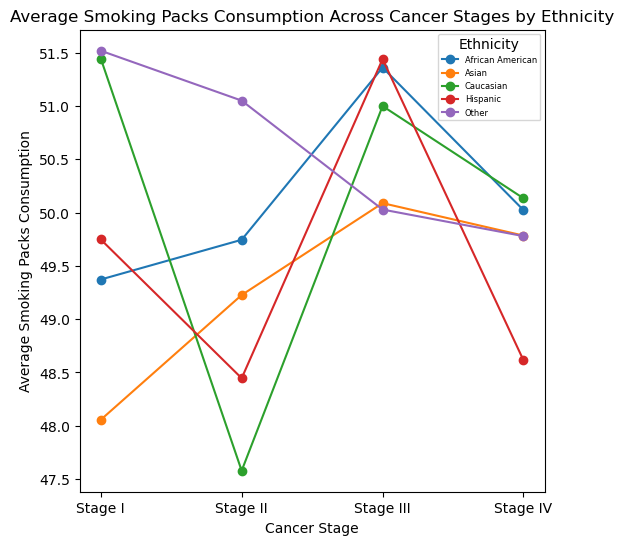

In [59]:
from task_c import plot_average_smoking_packs_consumption

plot_average_smoking_packs_consumption(df)

## C3

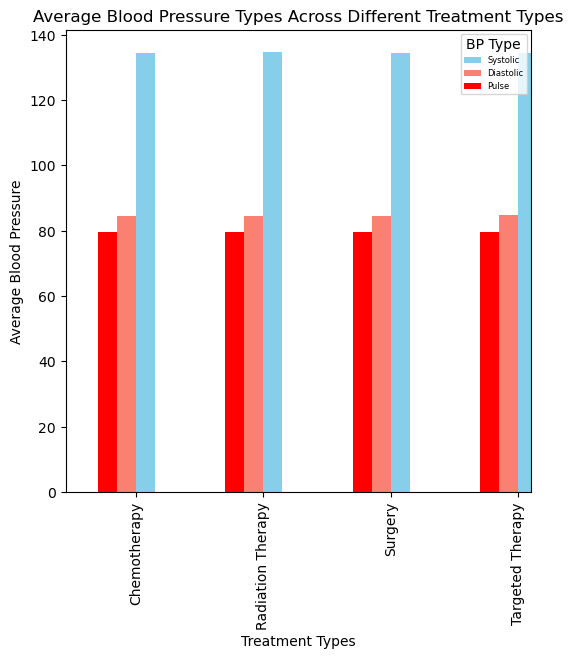

In [62]:
from task_c import plot_average_blood_pressure

plot_average_blood_pressure(df)

## C4

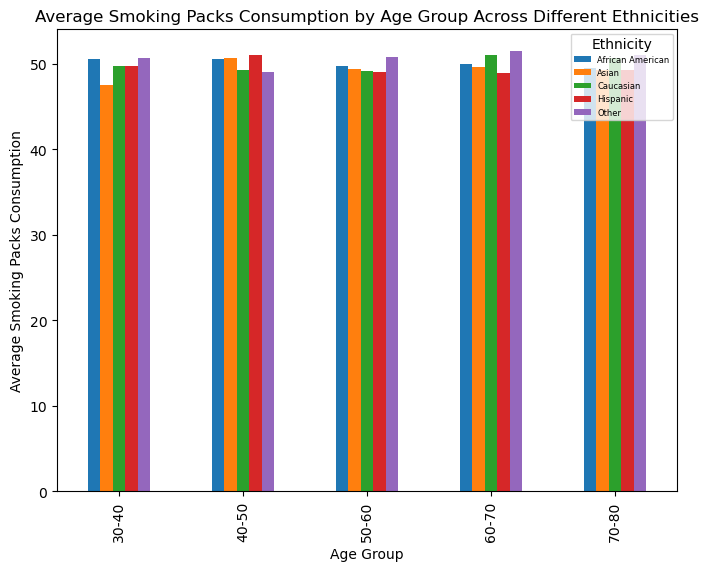

In [64]:
from task_c import plot_average_smoking_consumption_by_age_group

plot_average_smoking_consumption_by_age_group(df)
